In [1]:
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy_ref import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np

/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]
# tickers = ["MSFT", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
# tickData = tickData.dropna()

print(tickData.shape)
# Most Recent Data
tickData.head(50)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2203, 2)


,BTC-USD,ETH-USD
Date,,
2018-01-01,13657.200195,772.640991
2018-01-02,14982.099609,884.443970
2018-01-03,15201.000000,962.719971
2018-01-04,15599.200195,980.921997
2018-01-05,17429.500000,997.719971
2018-01-06,17527.000000,1041.680054
2018-01-07,16477.599609,1153.170044
2018-01-08,15170.099609,1148.530029
2018-01-09,14595.400391,1299.739990


Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2019-01-05), Full start (2018-01-05) End full (2020-01-05)]
Pair [ETH-USD, BTC-USD]
	Window: [Train start (2018-01-05) End train (2019-01-05), Full start (2018-01-05) End full (2020-01-05)]
	p-value: 6.428731506607349e-09
	Pair eligible: True


<Axes: xlabel='Date'>

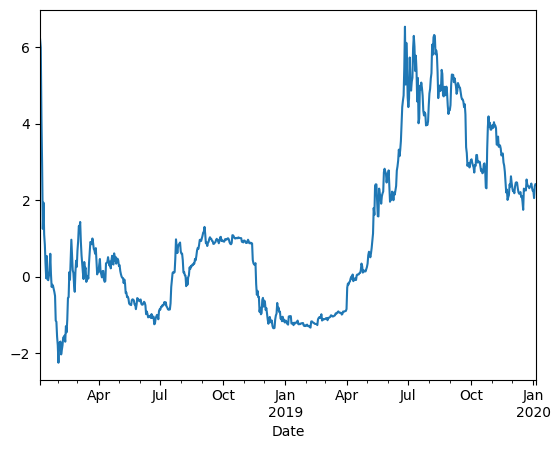

In [3]:
import warnings
warnings.filterwarnings('ignore')
# y_series, x_series, start_full, end_full, start_train, end_train
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2020-01-05','2018-01-05','2019-01-04')
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')
pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2020-01-05','2018-01-05','2019-01-05', 2*365)

# pair = PairStrategy(tickData['MSFT'],tickData['QQQ'],'2020-01-05','2022-01-04','2020-01-05','2022-01-04')


print(pair)
# print(pair.is_valid_pair())

# pair.OU_PARAMS_DICT['full_resid'].plot()

# pair.y_full.plot()

pair.OU_PARAMS_DICT['full_z_resid'].plot()
# pair.OU_PARAMS_DICT['full_resid'].plot()
# print(pair.AFF_DICT)
# print(pair.OLS_STATS_DICT)

# pair.data





(            Residuals      mu_e     upper     lower
 Date                                               
 2018-01-05   0.357283 -0.002326  0.055576 -0.060228
 2018-01-06   0.344754 -0.002326  0.055576 -0.060228
 2018-01-07   0.238583 -0.002326  0.055576 -0.060228
 2018-01-08   0.165480 -0.002326  0.055576 -0.060228
 2018-01-09   0.070169 -0.002326  0.055576 -0.060228
 ...               ...       ...       ...       ...
 2020-01-01   0.127781 -0.002326  0.055576 -0.060228
 2020-01-02   0.116861 -0.002326  0.055576 -0.060228
 2020-01-03   0.134695 -0.002326  0.055576 -0.060228
 2020-01-04   0.138098 -0.002326  0.055576 -0.060228
 2020-01-05   0.137638 -0.002326  0.055576 -0.060228
 
 [731 rows x 4 columns],
 {'mu_e': -0.002325987826688472,
  'upper': 0.055576258449485605,
  'lower': -0.06022823410286254})

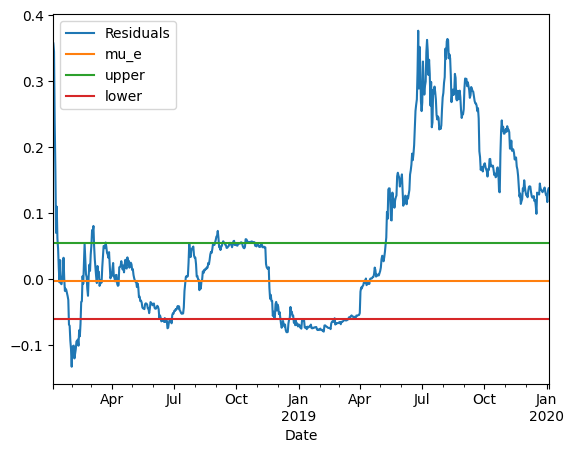

In [4]:
pair.plotRangeBoundFrame(1)

In [19]:
print(dict1)
print(dict2)
print()
print(pair.oU_res_train)

print('Linear Regresion TRAINING', pair.name)
print(pair.linear_regression_training_df)
ou = pair.ou
print('sigma eq', ou.sigmaeq)
print('sigma ou', ou.sigmaOU)
print('half life', ou.half_life)
print('tau', ou.tau)



NameError: name 'dict1' is not defined

In [11]:
from src.cointegration.ou_fit import OUFit
#Start residuals 2018-01-05 00:00:00) End train 2019-01-04 00:00:00)
dict1 = dictionary_ou_params(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2020-01-05')
dict2 = dictionary_ou_params_mine(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2020-01-05')

ou_fit = OUFit(pair.train_residuals, 1/365)
ou_fit.fit()
print(ou_fit.sigmaOU)
print(ou_fit.sigmaeq)
print(ou_fit.theta)
print(ou_fit.mu)
print()
print()

ou_fit.fit2()
print(ou_fit.sigmaOU)
print(ou_fit.sigmaeq)
print(ou_fit.theta)
print(ou_fit.mu)

#same
# print(dict1)
# print(dict2)
# dict1['spread'].plot()
# dict2['spread'].plot()

start 2018-01-05 00:00:00  upto  2019-01-04 00:00:00
final 2018-01-05 00:00:00  upto  2020-01-05 00:00:00
start 2018-01-05 00:00:00  upto  2019-01-04 00:00:00
final 2018-01-05 00:00:00  upto  2020-01-05 00:00:00
0.5802331639902589
0.07370111815141919
30.990383207110334
-0.002929100850733708


0.5802331639902589
0.07370111815141919
30.965862595943978
-0.002929100850733708


In [ ]:
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(tickData['ETH-USD'],tickData['BTC-USD'], end_look_back_date='2019-01-01', lookback_period=365)

x_train

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2018-12-27     3654.833496
2018-12-28     3923.918701
2018-12-29     3820.408691
2018-12-30     3865.952637
2018-12-31     3742.700439
Name: BTC-USD, Length: 365, dtype: float64

In [ ]:
EG_2

,Estimate,SD of Estimate,t-Statistic,p-value
ΔBTC-USD,1.350075,0.057245,23.58404,3.667522e-75
"(Lag 1, Residuals)",0.136039,0.021057,6.46064,3.366042e-10
